# The effect of the changing number of folds on the performance score as observed by performing KNN cross-validation on the vehicles.csv dataset.

This study seeks to investigate the effect that the number of folds has on the performance score obtained by cross validation. It uses the vehicles.csv dataset which is not ideal unlike the generated.csv dataset on which the study begun in the first issue. This is to enable significant variation to be observed, on which conclusions can be made.

First, the needed modules are imported, then exploratory data analysis is carried out. Next, the cross validation score is calculated over a range of number-of-folds values. Then, after more analysis, a conclusion is made on the advantages and disadvantages of increasing the number of folds in cross validation.

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import explore_data
from sklearn.neighbors import KNeighborsClassifier
from load_dataset import load_dataset
from vary_folds import vary_folds

The load_dataset module is used to read the information of the vehicles.csv dataset into a pandas dataframe called df

In [10]:
filename = "vehicles.csv"
df = load_dataset(filename)

## Exploratory data analysis

The explore_data module is used to get insights into the structure and characteristics of the dataset. It contains functions that display raw data, quantitative analysis and visualisations.

In [11]:
print('A number of methods and attributes are used to get a quantitative view of the vehicles.csv dataset.')
explore_data.raw(df)

A number of methods and attributes are used to get a quantitative view of the vehicles.csv dataset.
**************************************************HEAD**************************************************
   COMPACTNESS  CIRCULARITY  DISTANCE_CIRCULARITY  RADIUS_RATIO  \
0           95           48                    83           178   
1           91           41                    84           141   
2          104           50                   106           209   
3           93           41                    82           159   
4           85           44                    70           205   

   PR.AXIS_ASPECT_RATIO  MAX.LENGTH_ASPECT_RATIO  SCATTER_RATIO  \
0                    72                       10            162   
1                    57                        9            149   
2                    66                       10            207   
3                    63                        9            144   
4                   103                       52         

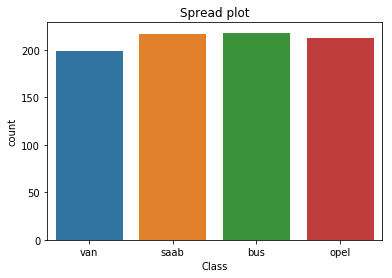

In [12]:
explore_data.histo(df, 'Class')

There are 846 observations. The target variable values are defined and discrete, so the model needed is a supervised learning model; specifically a classification machine learning model.
All columns have the same count. There are no null values in the dataset. The number of observations is less than a hundred thousand, so a linear support vector classifier is appropriate.
Also, the target values contain text data so the K-nearest neighbors classifier will be used.

The target variable is separated from the predictor variables, and the estimator is instantiated.

In [13]:
target = df['Class']
data = df.drop('Class', axis = 1)
knn = KNeighborsClassifier(n_neighbors = 5)

## The effect of changing the number of folds on the performance of a KNN classifier

The cross validation score over a range of folds is computed using the vary_folds function in the vary_folds module which returns which returns the average accuracy, the number of folds and the computation time per iteration.

In [14]:
folds, avg_score, duration = vary_folds(knn, data, target)

The performance score computed using cross validation varies with respect to the number of folds as shown below:

In [15]:
table = pd.DataFrame({'Number of folds':folds, 'Average score':avg_score})
print(table)

    Number of folds  Average score
0                 2       0.600543
1                 3       0.640851
2                 4       0.636102
3                 5       0.658608
4                 6       0.661007
5                 7       0.652783
6                 8       0.648070
7                 9       0.655156
8                10       0.658642
9                11       0.649287
10               12       0.662430
11               13       0.651685
12               14       0.653177
13               15       0.654203
14               16       0.657857
15               17       0.656559
16               18       0.655433
17               19       0.659225
18               20       0.661418
19               21       0.658969
20               22       0.660288
21               23       0.657949
22               24       0.653046
23               25       0.660198
24               26       0.662393
25               27       0.656452
26               28       0.659631
27               29 

It is observed that the accuracy increases with increases with an increase with number of folds, however this increase is very small. The increase can be deemed insignificant depending on the precision standards enforced by the experiment which demands the performance value. 
This observation suggests that in order to get maximum performance, the number of folds in cross validation should be increased to infinity. Nonethelesss, more investigation was done to understand why this was not the case. The number of folds was typically limited to small numbers.

### The effect of increased cross validation folds on computation time

The computation time of the cross validation per fold was plotted on the same graph as the accuracy per fold.

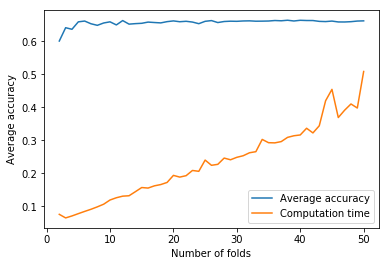

In [16]:
plt.figure()
plt.plot(folds, avg_score, label='Average accuracy')
plt.plot(folds, duration, label='Computation time')
plt.legend()
plt.xlabel('Number of folds')
plt.ylabel('Average accuracy')
plt.show()

It is observed that though the accuracy remains more or less constant, the computation time increases significantly per increase in number of cross validation folds. Hence for the sake of maximising the use of limited computational resources, a compromise needs to be made. Hence it is typical to have 10 fold and 5 fold cross validation.